# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

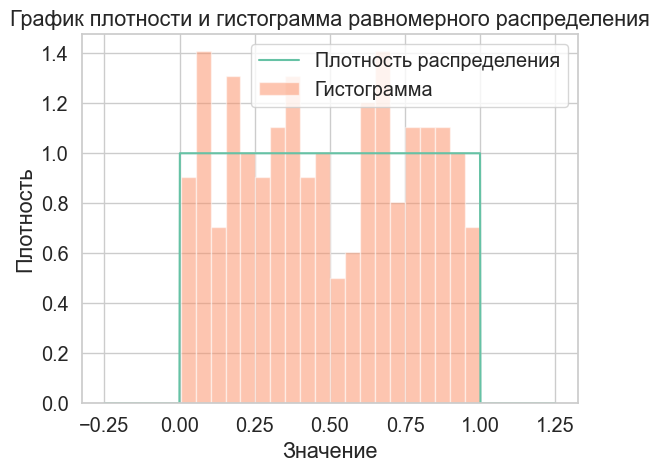

In [3]:
data = np.random.uniform(low=0, high=1, size=200)

# Построение графика плотности
x = np.linspace(-0.25, 1.25, 1000)
density = np.where((x >= 0) & (x <= 1), 1, 0)
plt.plot(x, density, label='Плотность распределения')
plt.title('График плотности и гистограмма равномерного распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Построение гистограммы
plt.hist(data, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.legend()

plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

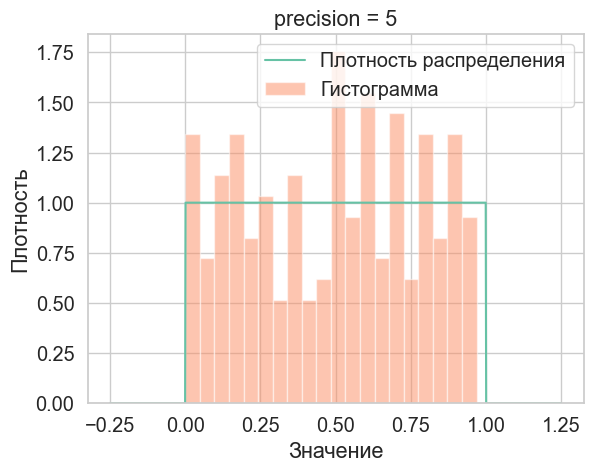

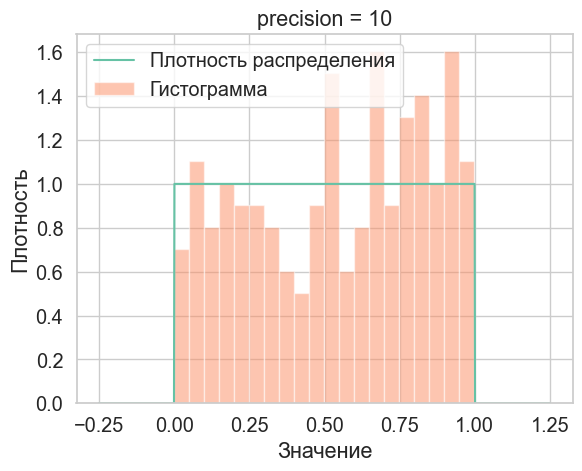

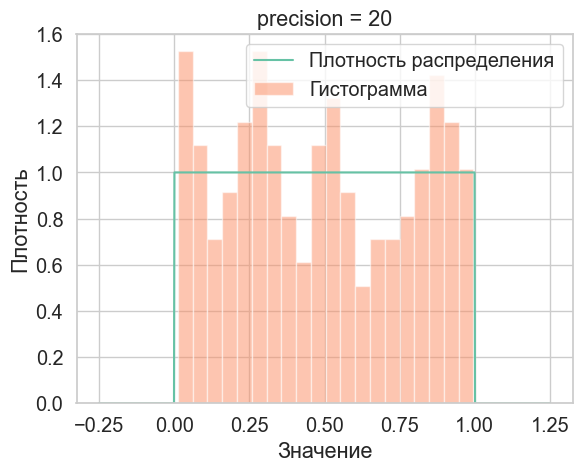

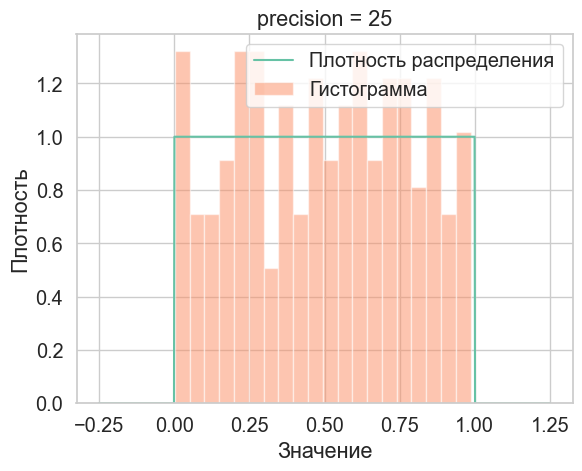

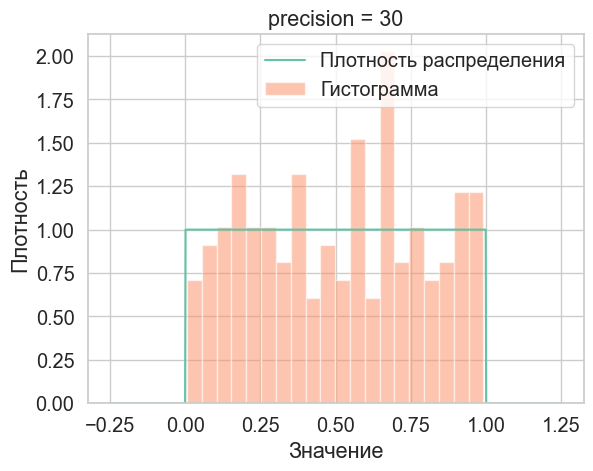

In [4]:
def uniform(size=1, precision=30):
    return  np.random.randint(0, 2**precision, size) / (2**precision)

def plot_uniform_distribution(precision):
    # Генерация выборки размера 200 из равномерного распределения
    data = uniform(size=200, precision=precision)

    # Построение графика плотности
    x = np.linspace(-0.25, 1.25, 1000)
    density = np.where((x >= 0) & (x <= 1), 1, 0)
    plt.plot(x, density, label='Плотность распределения')

    # Построение гистограммы
    plt.hist(data, bins=20, density=True, alpha=0.5, label='Гистограмма')
    plt.legend()

    plt.title(f'precision = {precision}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')

    plt.show()

# Исследование для нескольких значений precision
precisions = [5, 10, 20, 25, 30]
for precision in precisions:
    plot_uniform_distribution(precision)

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

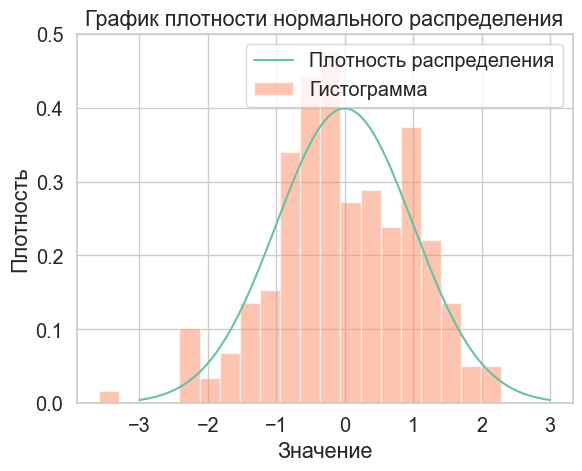

In [5]:
# Генерация 200 независимых случайных величин из стандартного нормального распределения
data = np.random.normal(loc=0, scale=1, size=200)

# Построение графика плотности
x = np.linspace(-3, 3, 1000)
density = (1/(np.sqrt(2*np.pi))) * np.exp(-(x**2)/2)
plt.plot(x, density, label='Плотность распределения')
plt.title('График плотности нормального распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

# Построение гистограммы
plt.hist(data, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.legend()

plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

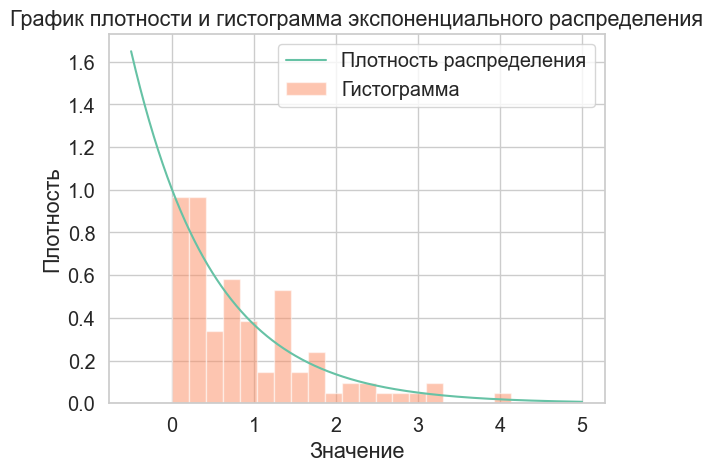

In [6]:
data = np.random.exponential(scale=1, size=100)

# Построение графиков
x = np.linspace(-0.5, 5, 1000)
density = np.exp(-x)
plt.plot(x, density, label='Плотность распределения')
plt.title('График плотности и гистограмма экспоненциального распределения')
plt.xlabel('Значение')
plt.ylabel('Плотность')

# Построение гистограммы
plt.hist(data, bins=20, density=True, alpha=0.5, label='Гистограмма')
plt.legend()

plt.show()

**Выводы:**

Мы увидели, что каждое распределение имеет свои уникальные особенности, которые отображаются на графиках. График плотности позволяет нам визуально оценить форму и общие характеристики распределения, в то время как гистограмма дает представление о конкретной выборке из этого распределения.
Эксперимент с различными значениями precision показал, что увеличение precision приводит к более детализированному представлению распределения на графике. При этом увеличение precision увеличивает количество возможных значений, что делает график более гладким и точным.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

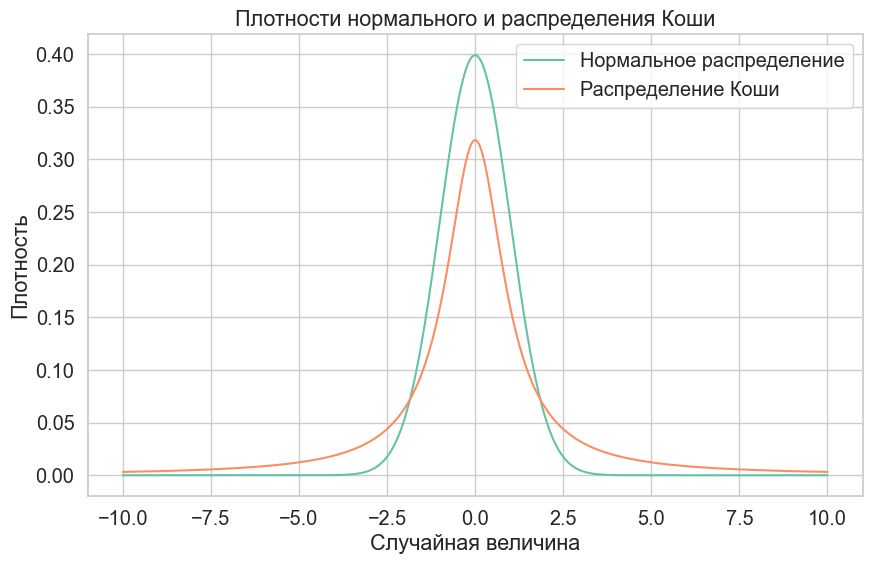

In [7]:

x = np.linspace(-10, 10, 1000)

# Вычисляем плотности нормального и распределения Коши
normal_pdf = sps.norm.pdf(x, loc=0, scale=1)
cauchy_pdf = sps.cauchy.pdf(x)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x, normal_pdf, label='Нормальное распределение')
plt.plot(x, cauchy_pdf, label='Распределение Коши')
plt.title('Плотности нормального и распределения Коши')
plt.xlabel('Случайная величина')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Плотность нормального распределения быстро убывает по мере удаления от среднего значения, в то время как плотность распределения Коши убывает намного медленнее. У распределения Коши тяжелые хвосты, что означает, что вероятность получения очень больших или очень маленьких значений существенно выше, чем у нормального распределения.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

(-90.0, 90.0)

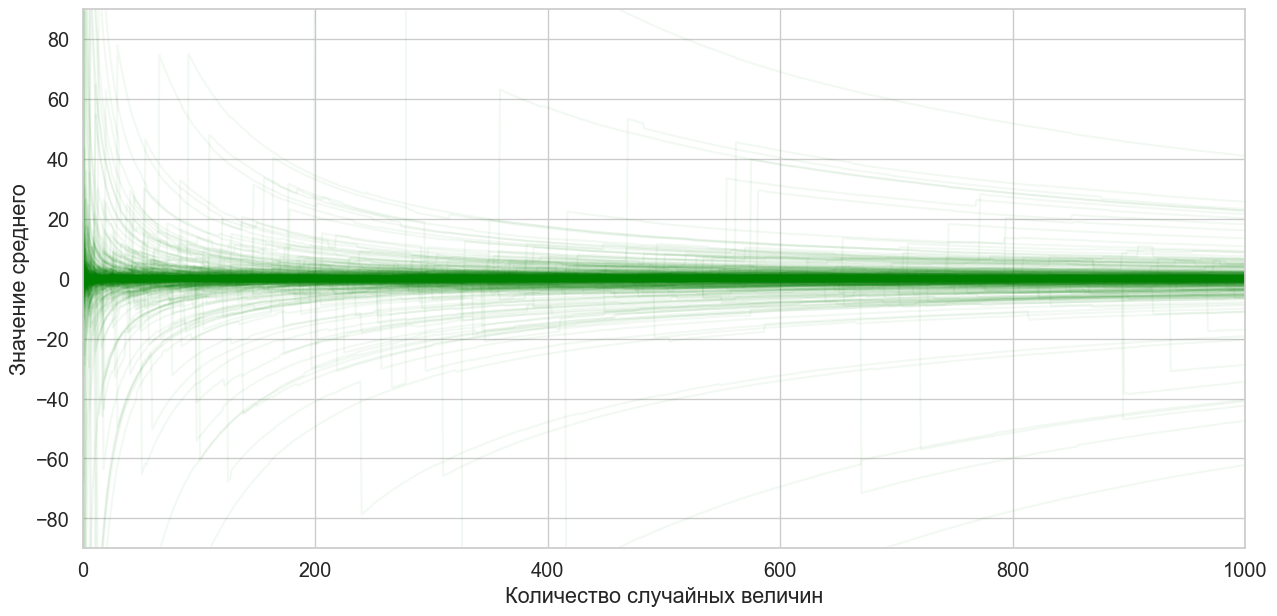

In [8]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

# Генерация выборок и вычисление накопительных средних
samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color="green", alpha=0.05)

plt.xlabel("Количество случайных величин")
plt.ylabel("Значение среднего")
plt.xlim((0, size));
plt.ylim((-90, 90))

Да, ЗБЧ выполняется для распределения Коши. На графике зависимости выборочного среднего от размера выборки для распределения Коши мы видим, что при увеличении размера выборки выборочное среднее сходится к некоторой константе. Это подтверждает ЗБЧ, который утверждает, что среднее выборочное стремится к теоретическому среднему с увеличением размера выборки. Однако стоит отметить, что колебания вокруг теоретического среднего достаточно большие из-за тяжелых хвостов распределения Коши.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

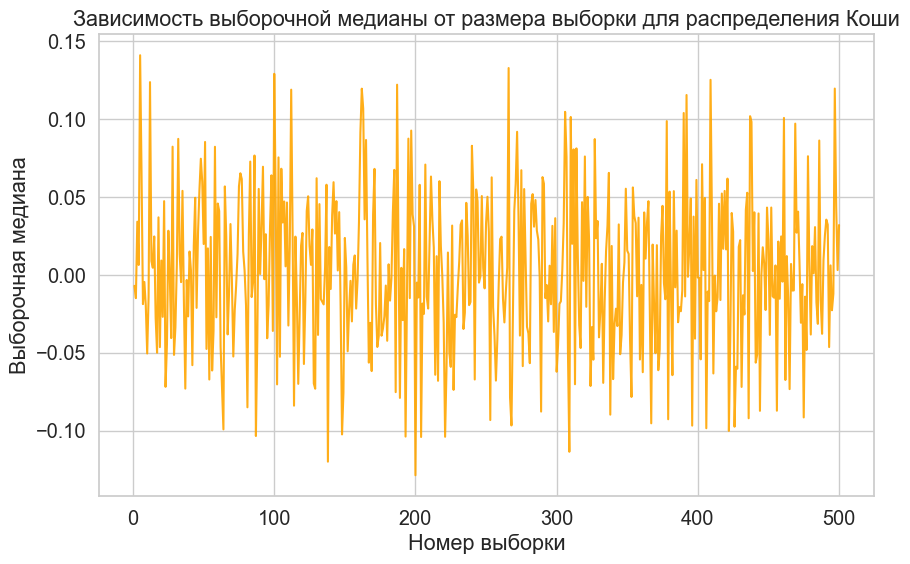

In [9]:
size = 1000  # количество случайных величин
samples_count = 500  # количество выборок

# Генерация выборок и вычисление выборочных медиан
samples = sps.cauchy.rvs(size=(samples_count, size))
sample_medians = np.median(samples, axis=1)

# Построение графика для выборочной медианы
plt.figure(figsize=(10, 6))
plt.plot(np.arange(samples_count) + 1, sample_medians, color="orange", alpha=0.9)
plt.xlabel("Номер выборки")
plt.ylabel("Выборочная медиана")
plt.title('Зависимость выборочной медианы от размера выборки для распределения Коши')
plt.grid(True)
plt.show()

**Вывод:**

Мы сравнили плотности нормального и распределения Коши, обнаружив, что у Коши медленное убывание плотности и осциллирующий характер. Эксперимент по закону больших чисел для Коши подтвердил, что среднее выборочное сходится к теоретическому среднему с увеличением размера выборки, но колебания могут быть значительными.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимент для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

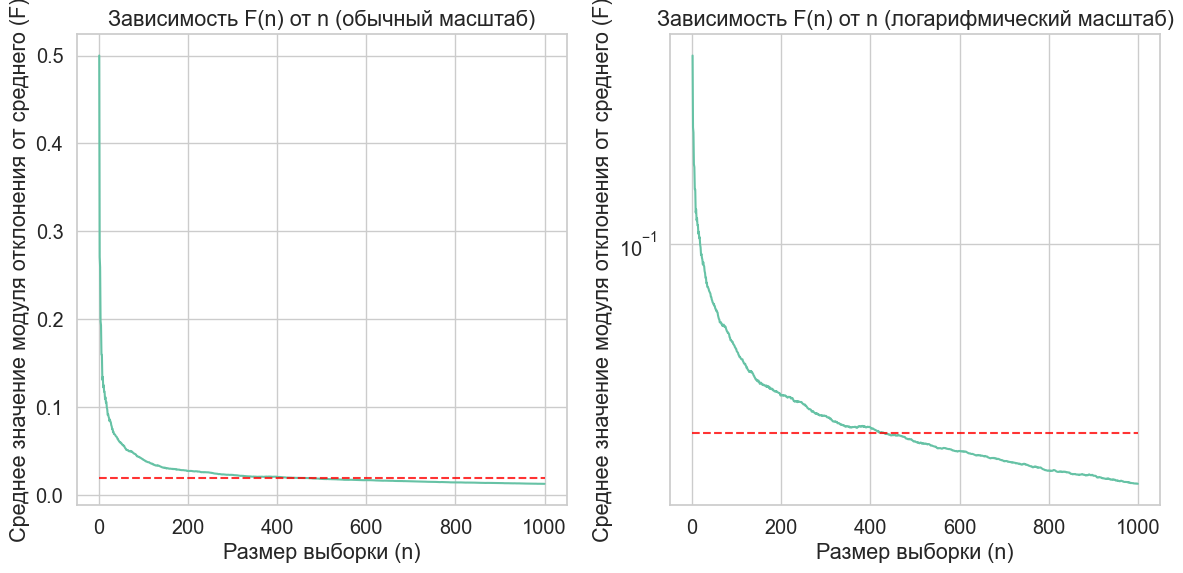

In [10]:
def generate_bernoulli_samples(a, n_samples, sample_size):
    """
    Генерирует выборки из распределения Бернулли с параметром a.

    Args:
    - a (float): параметр распределения Бернулли
    - n_samples (int): количество выборок
    - sample_size (int): размер каждой выборки

    Returns:
    - samples (numpy.ndarray): массив выборок размера (n_samples, sample_size)
    """
    return np.random.binomial(1, a, size=(n_samples, sample_size))

def calculate_F(samples, true_mean):
    """
    Вычисляет среднее значение модуля отклонения от истинного среднего для выборок.

    Args:
    - samples (numpy.ndarray): массив выборок размера (n_samples, sample_size)
    - true_mean (float): истинное среднее

    Returns:
    - F (float): среднее значение модуля отклонения от истинного среднего
    """
    sample_means = np.mean(samples, axis=1)
    return np.mean(np.abs(sample_means - true_mean))

# Параметры
a = 0.5
n_samples = 500
tolerance = 0.02
sample_sizes = np.arange(1, 1001)

# Генерируем выборки и вычисляем F с помощью своих функций
samples = generate_bernoulli_samples(a, n_samples, sample_sizes[-1])
F_values = [calculate_F(samples[:, :n], a) for n in sample_sizes]

# Построение графиков
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, F_values)
plt.hlines(tolerance, 0, sample_sizes[-1], colors='r', linestyles='--', alpha=0.8, label='Допустимое отклонение')
plt.xlabel('Размер выборки (n)')
plt.ylabel('Среднее значение модуля отклонения от среднего (F)')
plt.title('Зависимость F(n) от n (обычный масштаб)')

# Логарифмический масштаб
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, F_values)
plt.hlines(tolerance, 0, sample_sizes[-1], colors='r', linestyles='--', alpha=0.8, label='Допустимое отклонение')
plt.xlabel('Размер выборки (n)')
plt.ylabel('Среднее значение модуля отклонения от среднего (F)')
plt.title('Зависимость F(n) от n (логарифмический масштаб)')
plt.yscale('log')

plt.tight_layout()
plt.show()

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

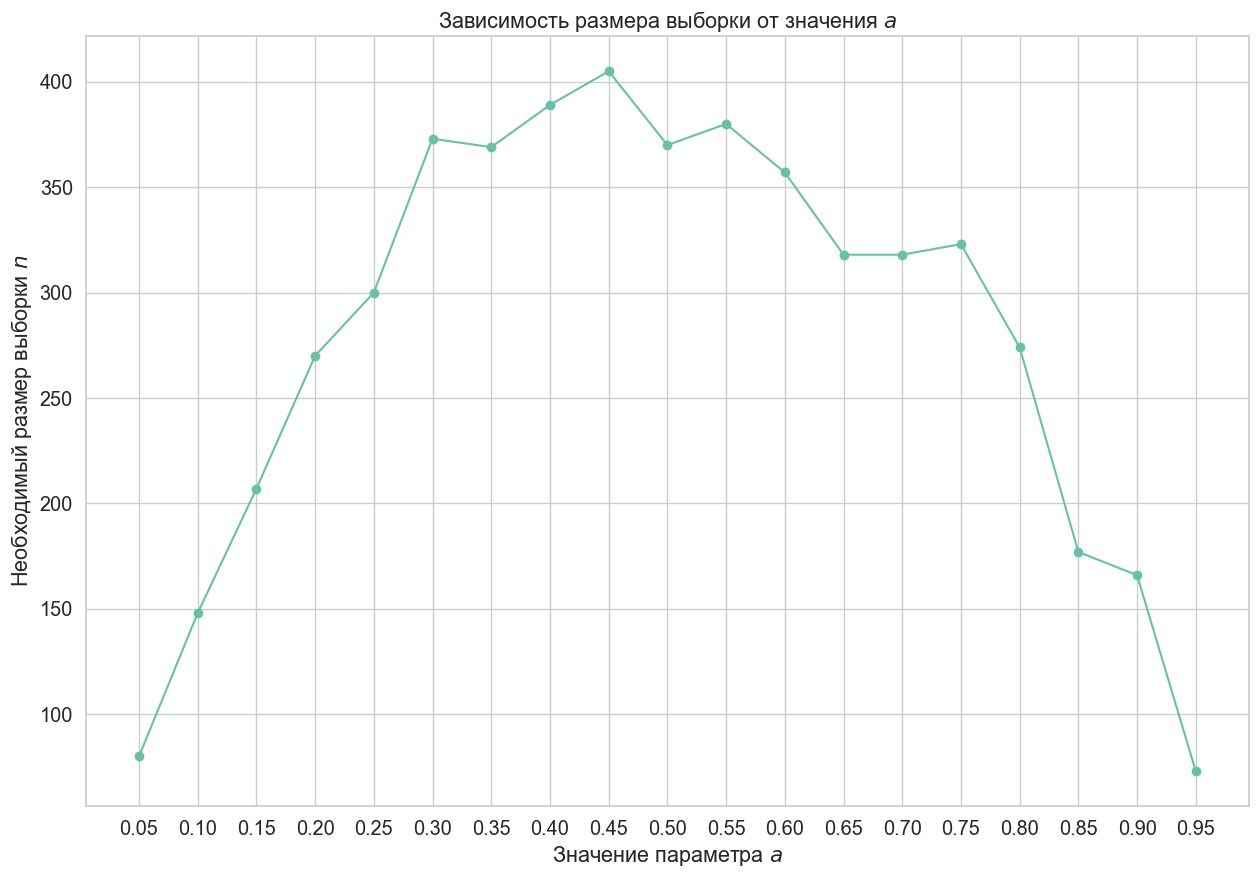

In [11]:
# Параметры
n_samples = 500
tolerance = 0.02
sample_size = 1000

a_values = np.arange(0.05, 1.0, 0.05)
n_values = []

# Повторяем эксперимент для каждого значения a
for a in a_values:
    # Генерируем выборки и вычисляем F с помощью своих функций
    samples = generate_bernoulli_samples(a, n_samples, sample_size)
    F_values = [calculate_F(samples[:, :n], a) for n in range(1, sample_size + 1)]

    # Находим минимальный размер выборки, при котором F(n) <= tolerance
    n = np.argmax(np.array(F_values) <= tolerance) + 1
    n_values.append(n)

# Построение графика
plt.figure(figsize=(15, 10))
plt.plot(a_values, n_values, marker='o', linestyle='-')
plt.xlabel('Значение параметра $a$')
plt.ylabel('Необходимый размер выборки $n$')
plt.title('Зависимость размера выборки от значения $a$')
plt.grid(True)
plt.xticks(a_values)
plt.show()

**Выводы:**


После анализа графика можно сделать вывод, что для более экстремальных значений a (ближе к 0 или 1) требуется меньший размер выборки для достижения той же точности оценки, чем для значений a ближе к 0.5. Это объясняется меньшим разбросом выборок при более экстремальных значениях a и тем, что выборки более "репрезентативны" и требуют меньшего размера для того, чтобы среднее значение выборки достаточно точно оценивало истинное среднее.
Таким образом, полученные результаты могут быть полезны в экспериментах, где необходимо определить оптимальный размер выборки в зависимости от значения параметра a и требуемой точности оценки.